In [2]:
# Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k
from keras.models import load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
from keras.datasets import mnist

In [4]:
# Split dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# Shape of the dataset
print("X_Train Shape: ", x_train.shape)
print("Y_Train Shape: ", y_train.shape)
print("X_Test Shape: ", x_test.shape)
print("Y_Test Shape: ", y_test.shape)

X_Train Shape:  (60000, 28, 28)
Y_Train Shape:  (60000,)
X_Test Shape:  (10000, 28, 28)
Y_Test Shape:  (10000,)


In [6]:
# Reshape the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [8]:
# Convert class vectors to binary class metrics
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
print('x_test.shape', x_test.shape)
print('Training sample: ', x_train.shape[0])
print('Testing sample: ', x_test.shape[0])

x_test.shape (10000, 28, 28, 1)
Training sample:  60000
Testing sample:  10000


In [25]:
# Create Model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

In [27]:
# Compile model
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [28]:
# Model Training
history = model.fit(x_train, y_train, batch_size = 128, epochs = 20, verbose = 1, validation_data = (x_test, y_test))
print("Model has been successfully trained")

Epoch 1/20
469/469 [==============================] - 31s 62ms/step - loss: 0.2093 - accuracy: 0.9358 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 2/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0596 - accuracy: 0.9817 - val_loss: 0.0343 - val_accuracy: 0.9881
Epoch 3/20
469/469 [==============================] - 35s 74ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0277 - val_accuracy: 0.9904
Epoch 4/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0338 - accuracy: 0.9894 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 5/20
469/469 [==============================] - 26s 54ms/step - loss: 0.0271 - accuracy: 0.9916 - val_loss: 0.0226 - val_accuracy: 0.9919
Epoch 6/20
469/469 [==============================] - 25s 54ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0255 - val_accuracy: 0.9925
Epoch 7/20
469/469 [==============================] - 25s 53ms/step - loss: 0.0210 - accuracy: 0.9935 - val_loss: 0.0240 - val_accuracy:

In [29]:
# Model Evaluation
score = model.evaluate(x_test, y_test, verbose = 2)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 - 2s - loss: 0.0268 - accuracy: 0.9938 - 2s/epoch - 7ms/step
Test loss:  0.026849551126360893
Test accuracy:  0.9937999844551086


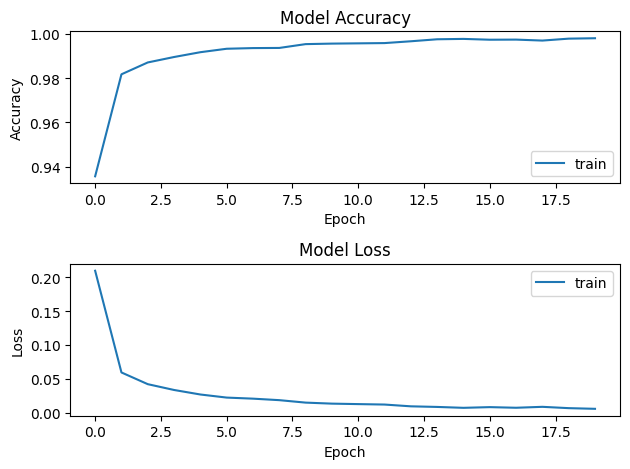

In [30]:
# Plotting figures
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper right')

plt.tight_layout()

In [31]:
# Model Saving
model.save('mnist.model')
print('Saving the model as mnist.h5')

INFO:tensorflow:Assets written to: mnist.model\assets


INFO:tensorflow:Assets written to: mnist.model\assets


Saving the model as mnist.h5


In [32]:
# Prediction
new_model = load_model('mnist.model')
prediction = new_model.predict(x_test)
print(prediction)

313/313 [==============================] - 3s 7ms/step
[[2.4875381e-14 2.6015620e-11 8.6062917e-13 ... 1.0000000e+00
  7.1216006e-12 2.1395521e-09]
 [9.8101465e-14 1.0068845e-11 1.0000000e+00 ... 7.4893393e-16
  7.8987098e-16 1.6110846e-19]
 [2.2460799e-11 9.9999940e-01 1.6013647e-09 ... 3.9595210e-07
  2.8187555e-09 1.2203762e-11]
 ...
 [5.8226762e-24 1.2481435e-14 1.7886154e-19 ... 4.9526236e-13
  1.6738489e-14 9.8192718e-16]
 [1.4179893e-14 2.2762314e-15 3.3956003e-23 ... 1.8778910e-16
  1.2539052e-08 1.8727402e-16]
 [1.4717275e-14 4.8668878e-15 8.2991638e-13 ... 2.1584945e-19
  6.8375736e-13 1.5235364e-18]]


In [33]:
print(np.argmax(prediction[5]))

1


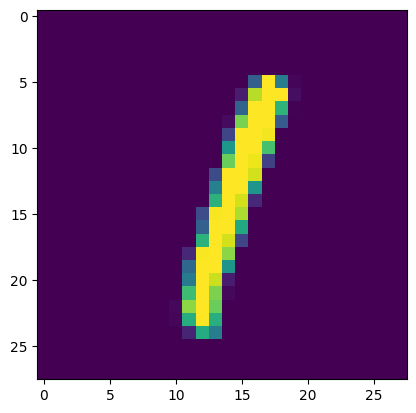

In [34]:
plt.imshow((tf.squeeze(x_test[5])))
plt.show()

In [35]:
# Predict the first 10 images
pred = model.predict(x_test[:10])
# print model prediction
print(np.argmax(pred, axis=1))
print(y_test[:5])

1/1 [==============================] - 0s 137ms/step
[7 2 1 0 4 1 4 9 5 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


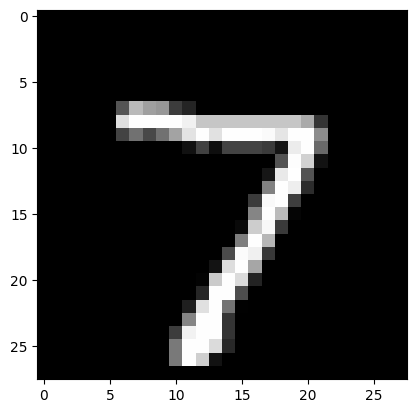

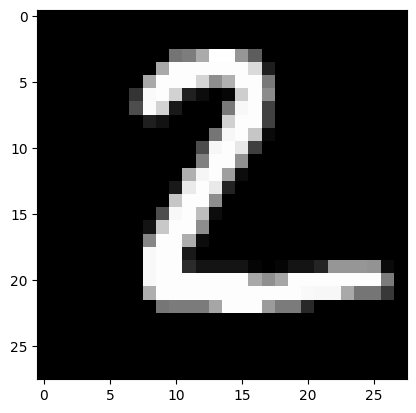

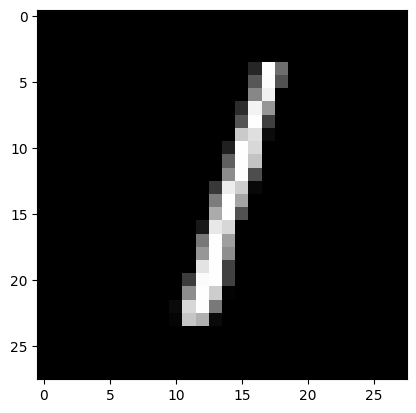

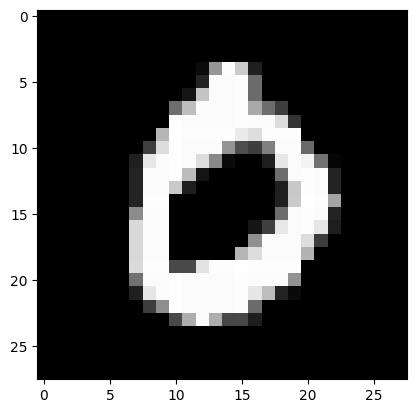

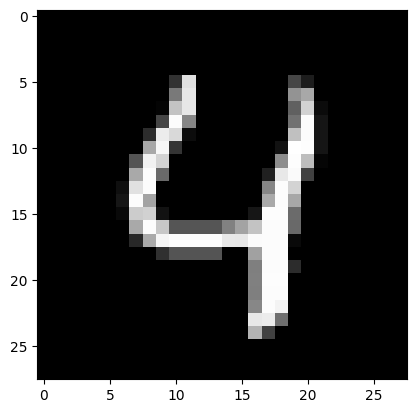

In [36]:
for i in range(5):
    first_img = x_test[i]
    first_img = np.array(first_img, dtype = 'float')
    pixels = first_img.reshape((28, 28))
    plt.imshow(pixels, cmap = 'gray')
    plt.show()